In [1]:
import urllib # need for api transportation
import json 
import pandas as pd 
import numpy as np
import seaborn as sns 
from scipy.stats import t
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
#İlçe, Yıl ve Atık Türü Bazında Atık Miktarına ait veriyi import ediyorum.
url = 'https://data.ibb.gov.tr/datastore/odata3.0/25077460-ddfb-45b6-b32c-4615f0ad2d57?$format=json'
def pulldataToDataframe(url):
    query = urllib.request.urlopen(url)    # API connection
    data = json.loads(query.read().decode())    # Change to json type
    data = data.get("value")    # Only getting data value
    return pd.DataFrame(data)     # Change to dataframe

In [3]:
df = pulldataToDataframe(url)

print(df.columns) 
df = df.drop(columns="_id") #id sütununu kaldırıyorum.

Index(['_id', 'Ilce Adi', 'Ortalama Hanehalki Buyuklugu'], dtype='object')


In [4]:
df.head()

,Ilce Adi,Ortalama Hanehalki Buyuklugu
0,Adalar,2.54
1,Bakırköy,2.87
2,Beşiktaş,2.47
3,Beykoz,3.29
4,Beyoğlu,3.11


In [5]:
df.tail()

,Ilce Adi,Ortalama Hanehalki Buyuklugu
34,Beylikdüzü,3.35
35,Çekmeköy,3.45
36,Esenyurt,3.66
37,Sancaktepe,3.75
38,Sultangazi,4.10


In [6]:
df

,Ilce Adi,Ortalama Hanehalki Buyuklugu
0,Adalar,2.54
1,Bakırköy,2.87
2,Beşiktaş,2.47
3,Beykoz,3.29
4,Beyoğlu,3.11
5,Çatalca,2.79
6,Eyüp,3.32
7,Fatih,3.21
8,Gaziosmanpaşa,3.61
9,Kadıköy,2.49


In [7]:
df.rename(columns = {'Ilce Adi': 'Ilce'}, inplace = True)
df.head()

,Ilce,Ortalama Hanehalki Buyuklugu
0,Adalar,2.54
1,Bakırköy,2.87
2,Beşiktaş,2.47
3,Beykoz,3.29
4,Beyoğlu,3.11


In [8]:
#2018 yılına ait ilçe bazlı ortalama hane halkı büyüklüğüne ait verileri import ediyorum.
url = 'https://data.ibb.gov.tr/datastore/odata3.0/50036dfd-aea5-4f06-832f-f7020fdaaa5a?$format=json'
waste_df = pulldataToDataframe(url)

print(waste_df.columns) 
waste_df = waste_df.drop(columns="_id") # ID removal

Index(['_id', 'Ilce', 'Veri Turu', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020'],
      dtype='object')


In [9]:
waste_df.head()

,Ilce,Veri Turu,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Adalar,Miktar (m2),0,0,0,4430325,6840975,0,NaN,NaN,1845000,894060,250959,208506,219381,0.0,1837500.0,9082500.0,5844330.0
1,Arnavutköy,Miktar (m2),3764718,3982225,4177973,13071597,13976808,8954565,897135.0,NaN,10089000,16996146,26663472,48524604,44713065,49392936.0,65503887.0,87659454.0,31498125.0
2,Ataşehir,Miktar (m2),21526602,18734705,18279330,21449004,19444238,5258250,8433435.0,7129710.0,7868640,19906305,21771993,33403455,38000368,42018354.0,47853606.0,48441360.0,21541611.0
3,Avcılar,Miktar (m2),12103670,13409406,15695234,37326300,39766300,20498370,23615423.0,20128032.0,31550508,36285375,36761727,43818078,48915975,48543903.0,49830384.0,54300948.0,22698126.0
4,Bahçelievler,Miktar (m2),22962325,24890940,27236652,28599800,29049800,20409780,25322172.0,21738999.0,23639097,23804130,26686215,30669096,15652107,16177878.0,29548563.0,29185767.0,11198229.0


In [10]:
waste_df = waste_df [["Ilce","2018"]]

In [11]:
waste_df.rename(columns = {'2018': 'Atik'}, inplace = True)
waste_df.head()

,Ilce,Atik
0,Adalar,1837500.0
1,Arnavutköy,65503887.0
2,Ataşehir,47853606.0
3,Avcılar,49830384.0
4,Bahçelievler,29548563.0


In [12]:
#2 veri setini birleştiriyorum.
last_data = pd.merge(df, waste_df, on = 'Ilce')
last_data

,Ilce,Ortalama Hanehalki Buyuklugu,Atik
0,Adalar,2.54,1837500.0
1,Bakırköy,2.87,106448098.0
2,Beşiktaş,2.47,71536122.0
3,Beykoz,3.29,52438272.0
4,Beyoğlu,3.11,148323810.0
5,Çatalca,2.79,14948784.0
6,Eyüp,3.32,174330875.0
7,Fatih,3.21,207084139.0
8,Gaziosmanpaşa,3.61,26276577.0
9,Kadıköy,2.49,77928511.5


In [13]:
last_data.sort_values('Atik').tail()  # M^2 cinsinden en çok atık miktarına sahip ilçe Fatih ilçesidir.

,Ilce,Ortalama Hanehalki Buyuklugu,Atik
27,Maltepe,3.02,125878734.0
20,Pendik,3.49,140008711.5
4,Beyoğlu,3.11,148323810.0
6,Eyüp,3.32,174330875.0
7,Fatih,3.21,207084139.0


In [14]:
data1 = last_data["Ortalama Hanehalki Buyuklugu"] 
data1

0     2.54
1     2.87
2     2.47
3     3.29
4     3.11
5     2.79
6     3.32
7     3.21
8     3.61
9     2.49
10    3.20
11    3.09
12    3.15
13    2.66
14    2.69
15    3.11
16    3.72
17    3.29
18    3.33
19    3.46
20    3.49
21    3.43
22    3.46
23    3.45
24    3.99
25    3.49
26    3.44
27    3.02
28    4.32
29    3.33
30    3.83
31    4.14
32    3.18
33    3.81
34    3.35
35    3.45
36    3.66
37    3.75
38    4.10
Name: Ortalama Hanehalki Buyuklugu, dtype: float64

In [15]:
data2 = last_data["Atik"] 
data2

0       1837500.0
1     106448098.0
2      71536122.0
3      52438272.0
4     148323810.0
5      14948784.0
6     174330875.0
7     207084139.0
8      26276577.0
9      77928511.5
10     95416065.0
11     64740933.0
12      7998636.0
13     17059242.0
14    116871129.0
15     96429525.0
16    103202874.0
17     28225779.0
18     58782612.0
19     82484073.0
20    140008711.5
21     79789717.5
22     25684410.0
23     49830384.0
24     24940266.0
25     29548563.0
26     14318427.0
27    125878734.0
28     28087884.0
29     82564980.0
30     46499230.5
31     65503887.0
32     47853606.0
33     62999277.0
34     49144369.0
35     28142973.0
36     69928676.0
37     33969717.0
38     91915143.0
Name: Atik, dtype: float64

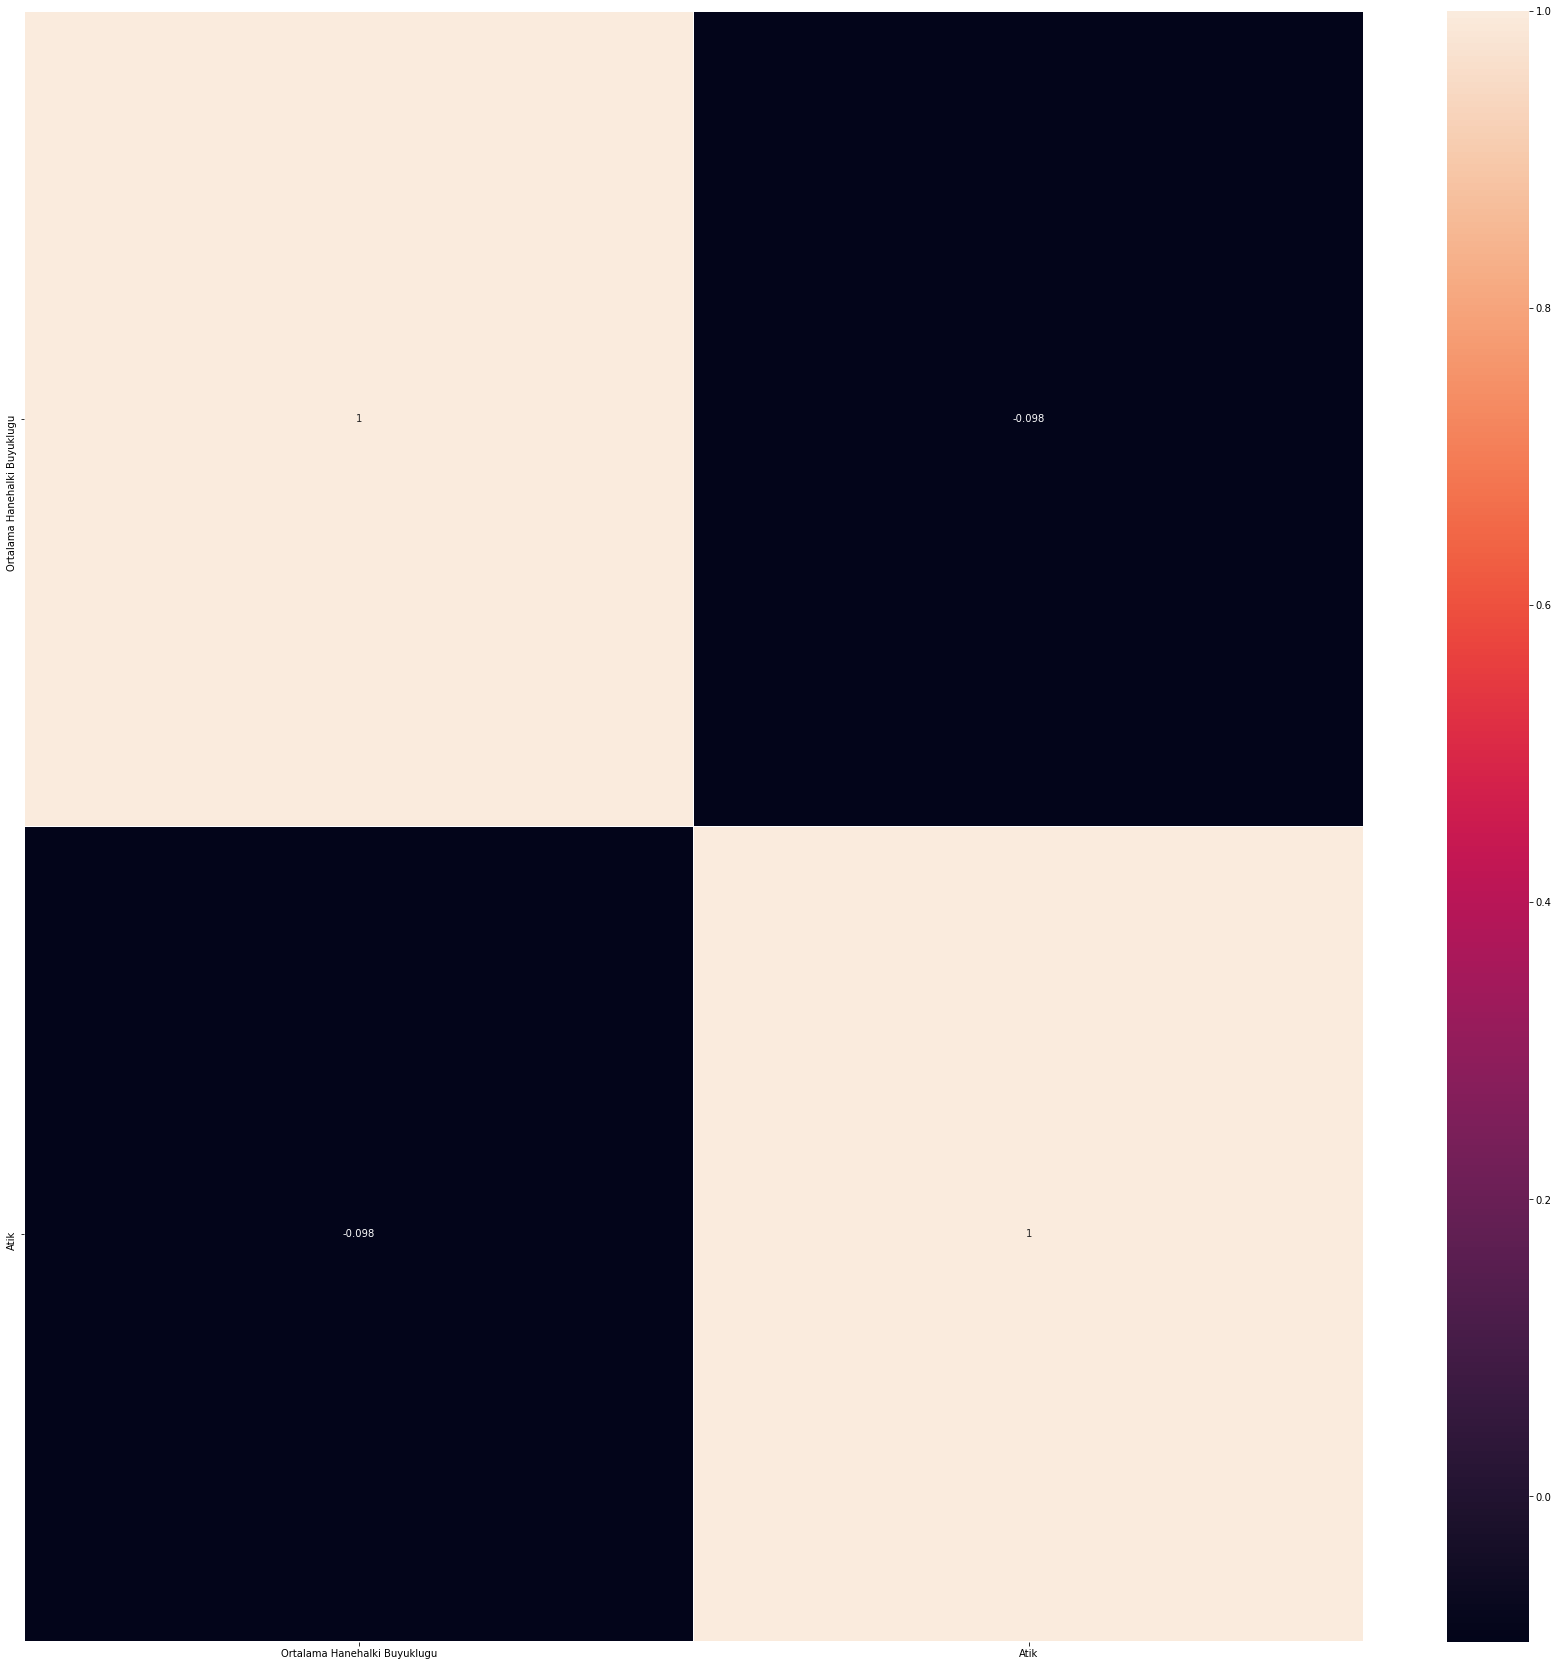

In [16]:
corr_matrix=last_data.corr()
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(corr_matrix,annot=True,linewidths=0.1, ax=ax)

Text(0.5, 1.0, 'Correlation ')

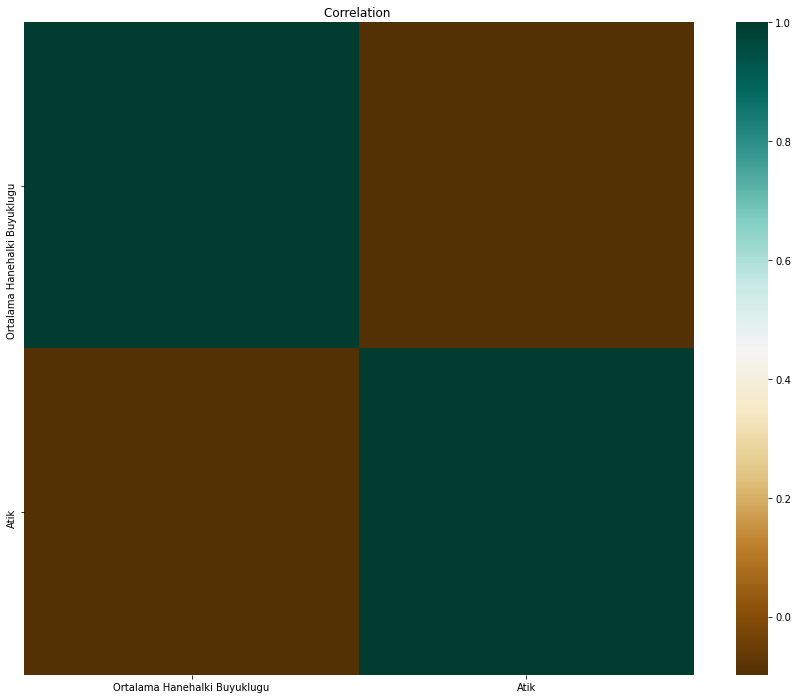

In [17]:
corr=last_data.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='BrBG')
r.set_title("Correlation ")

In [18]:
#Korelasyon ilişkisine bakıyorum.
corr_matrix = last_data.corr().abs()
sorted_corr=(corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool)).stack()
            .sort_values(ascending=False))
sorted_corr.head()

Ortalama Hanehalki Buyuklugu  Atik    0.097859
dtype: float64

H_0= Atık miktarı ile ilçelerin ortalama hane halkı büyüklüğü arasında bir ilişki yoktur.





H_1 =  Atık miktarı ile ilçelerin ortalama hane halkı büyüklüğü arasında bir ilişki vardır.


In [19]:
from scipy.stats import pearsonr
stat, p = pearsonr(data1, data2)

In [20]:
#  Hipotez testlerim hakkında yorum yapmak için p-value değerimi buluyorum.
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=-0.098, p=0.553
Probably independent


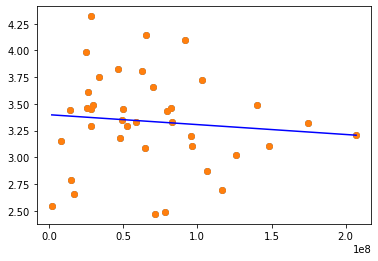

In [24]:
x = last_data['Atik']
y = last_data['Ortalama Hanehalki Buyuklugu']
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'blue')
plt.scatter(x , y=last_data['Ortalama Hanehalki Buyuklugu'])
plt.scatter(x = last_data['Atik'], y=last_data['Ortalama Hanehalki Buyuklugu'])